### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [5]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [6]:
data[data['car'].isnull() == False]['car'].values

array(['Scooter and motorcycle', 'Scooter and motorcycle',
       'Scooter and motorcycle', 'Scooter and motorcycle',
       'Scooter and motorcycle', 'Scooter and motorcycle',
       'Scooter and motorcycle', 'Scooter and motorcycle',
       'Scooter and motorcycle', 'Scooter and motorcycle',
       'Scooter and motorcycle', 'Scooter and motorcycle',
       'Scooter and motorcycle', 'Scooter and motorcycle',
       'Scooter and motorcycle', 'Scooter and motorcycle',
       'Scooter and motorcycle', 'Scooter and motorcycle',
       'Scooter and motorcycle', 'Scooter and motorcycle',
       'Scooter and motorcycle', 'Scooter and motorcycle', 'crossover',
       'crossover', 'crossover', 'crossover', 'crossover', 'crossover',
       'crossover', 'crossover', 'crossover', 'crossover', 'crossover',
       'crossover', 'crossover', 'crossover', 'crossover', 'crossover',
       'crossover', 'crossover', 'crossover', 'crossover', 'crossover',
       'Mazda5', 'Mazda5', 'Mazda5', 'Mazda5', 'Ma

In [7]:
data[data['direction_same'] == data['direction_opp']]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y


3. Decide what to do about your missing data -- drop, replace, other...

In [8]:
data = data.drop('car', axis=1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [10]:
data.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [11]:
data = data.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'])

In [12]:
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [13]:
data.shape

(12079, 25)

In [14]:
data = data.rename(columns={'passanger': 'passenger', 'has_children': 'hasChildren'})

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passenger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  hasChildren           12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nul

4. What proportion of the total observations chose to accept the coupon?



In [16]:
accept = data[data['Y'] == 1].shape[0]
accept_proportion = accept / data.shape[0]
print(accept_proportion)

0.5693352098683666


5. Use a bar plot to visualize the `coupon` column.

In [17]:
data['coupon'].value_counts()

Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: coupon, dtype: int64

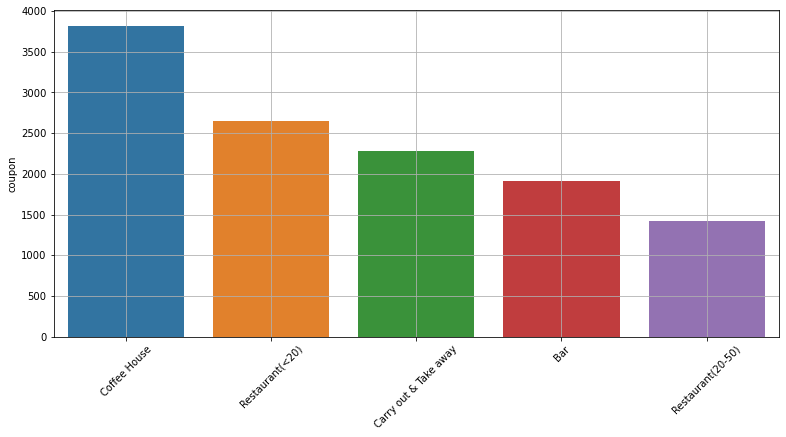

In [18]:
plt.figure(figsize=[13,6])
sns.barplot(data=data, x=data.coupon.value_counts().index, y=data.coupon.value_counts())
plt.xticks(rotation=45)
plt.grid()
plt.show()

6. Use a histogram to visualize the temperature column.

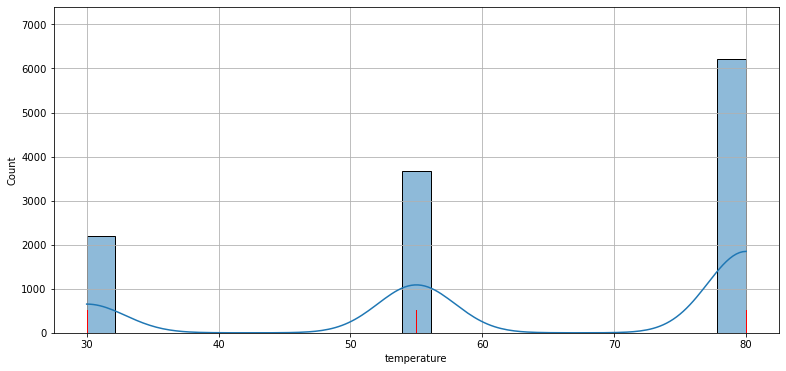

In [19]:
plt.figure(figsize=[13,6])
sns.histplot(data=data, x='temperature', kde=True)
sns.rugplot(data=data, x='temperature', color='red', height=0.07)
plt.grid()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [20]:
bar_coupons = data[data['coupon'] == 'Bar']
bar_coupons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1913 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passenger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1913 non-null   object
 9   maritalStatus         1913 non-null   object
 10  hasChildren           1913 non-null   int64 
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-null   object
 14  Bar                   1913 non-null   object
 15  CoffeeHouse           1913 non-null 

In [21]:
bar_coupons.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [22]:
accept_bar = bar_coupons[bar_coupons['Y'] == 1].shape[0]
accept_bar_proportion = accept_bar / bar_coupons.shape[0]
print(accept_bar_proportion)

0.41191845269210664


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [23]:
bar_coupons['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [24]:
fewer3 = ['never', 'less1', '1~3']
fewer3_df = bar_coupons[bar_coupons['Bar'].isin(fewer3)]
fewer3_accept = fewer3_df['Y'].sum()
fewer3_accept_rate = fewer3_accept / fewer3_df.shape[0]

more = ['4~8', 'gt8']
more_df = bar_coupons[bar_coupons['Bar'].isin(more)]
more_accept = more_df['Y'].sum()
more_accept_rate = more_accept / more_df.shape[0]

print(f'Acceptance rate amongst 3 or fewer bar outings per month sample: {fewer3_accept_rate}')
print(f'Acceptance rate amongst 4 or more bar outings per month sample: {more_accept_rate}')

Acceptance rate amongst 3 or fewer bar outings per month sample: 0.37267441860465117
Acceptance rate amongst 4 or more bar outings per month sample: 0.7616580310880829


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [25]:
bar_coupons['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [26]:
over25 = ['26', '31', '41', '46', '50plus', '36']
more1 = ['1~3', '4~8', 'gt8']
more1_over25_df = bar_coupons[(bar_coupons['Bar'].isin(more1)) & (bar_coupons['age'].isin(over25))]
more1_over25_accept = more1_over25_df['Y'].sum()
more1_over25_accept_rate = more1_over25_accept / more1_over25_df.shape[0]

other_df = bar_coupons[~bar_coupons.index.isin(more1_over25_df.index)]
other_accept = other_df['Y'].sum()
other_accept_rate = other_accept / other_df.shape[0]
print(f'Acceptance rate amongst 1 or more bar outings per month and over 25 sample: {more1_over25_accept_rate}')
print(f'Acceptance rate amongst all others sample: {other_accept_rate}')

Acceptance rate amongst 1 or more bar outings per month and over 25 sample: 0.6898263027295285
Acceptance rate amongst all others sample: 0.33774834437086093


#### Answer:

There seems to be a pretty big difference between the acceptance rates of people who go to a bar more than once a month and are over the age of 25 vs the acceptance rate of all the others. However, I am not sure if this difference is attributed more to the age of the people or the number of outings.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [27]:
bar_coupons['passenger'].unique()

array(['Friend(s)', 'Alone', 'Kid(s)', 'Partner'], dtype=object)

In [28]:
bar_coupons['occupation'].unique()

array(['Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Unemployed', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal', 'Retired',
       'Community & Social Services', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [29]:
notKid = ['Friend(s)', 'Partner']
fff = ['Farming Fishing & Forestry']
more1_notKid_notfff_df = bar_coupons[(bar_coupons['Bar'].isin(more1)) & (bar_coupons['passenger'].isin(notKid)) & (~bar_coupons['occupation'].isin(fff))]
more1_notKid_notfff_accept = more1_notKid_notfff_df['Y'].sum()
more1_notKid_notfff_accept_rate = more1_notKid_notfff_accept / more1_notKid_notfff_df.shape[0]

other_df = bar_coupons[~bar_coupons.index.isin(more1_notKid_notfff_df.index)]
other_accept = other_df['Y'].sum()
other_accept_rate = other_accept / other_df.shape[0]
print(f'Acceptance rate amongst 1 or more bar outings per month, no kid passenger, and not in farming fisshing or forestry job sample: {more1_notKid_notfff_accept_rate}')
print(f'Acceptance rate amongst all others sample: {other_accept_rate}')

Acceptance rate amongst 1 or more bar outings per month, no kid passenger, and not in farming fisshing or forestry job sample: 0.7142857142857143
Acceptance rate amongst all others sample: 0.37877030162412995


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [30]:
bar_coupons['maritalStatus'].unique()

array(['Single', 'Married partner', 'Unmarried partner', 'Divorced',
       'Widowed'], dtype=object)

In [31]:
bar_coupons['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [32]:
bar_coupons['income'].unique()

array(['$62500 - $74999', '$12500 - $24999', '$75000 - $87499',
       '$50000 - $62499', '$37500 - $49999', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [33]:
notWidowed = ['Single', 'Married partner', 'Unmarried partner', 'Divorced']
more1_notKid_notWidowed_df = bar_coupons[(bar_coupons['Bar'].isin(more1)) & (bar_coupons['passenger'].isin(notKid)) & (bar_coupons['maritalStatus'].isin(notWidowed))]
more1_notKid_notWidowed_accept_rate = more1_notKid_notWidowed_df['Y'].sum() / more1_notKid_notWidowed_df.shape[0]

under30 = ['21', '26', 'below21']
more1_under30_df = bar_coupons[(bar_coupons['Bar'].isin(more1)) & (bar_coupons['age'].isin(under30))]
more1_under30_accept_rate = more1_under30_df['Y'].sum() / more1_under30_df.shape[0]

more4 = ['4~8', 'gt8']
under50k = ['$12500 - $24999', '$37500 - $49999', 'Less than $12500', '$25000 - $37499']
c_df = bar_coupons[(bar_coupons['RestaurantLessThan20'].isin(more4)) & (bar_coupons['income'].isin(under50k))]
c_accept_rate = c_df['Y'].sum() / c_df.shape[0]

print(f'Acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: {more1_notKid_notWidowed_accept_rate}')
print(f'Acceptance rate of drivers who go to bars more than once a month and are under the age of 30: {more1_under30_accept_rate}')
print(f'Acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: {c_accept_rate}')

Acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 0.7142857142857143
Acceptance rate of drivers who go to bars more than once a month and are under the age of 30: 0.7195121951219512
Acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 0.45645645645645644


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

#### Answer: 

Based on my observations about bar coupons, I believe that there is a strong correlation between drivers accepting bar coupons if they have a history of going to bars at least once a month. Through all of the different investigations, the one trait that has always shown a high bar coupon acceptance rate is from drivers who frequent bars. However, I would like to believe that age has an important role in whether or not a driver accepts a bar coupon. However, I would like recommend investigating the value of age and seeing if there is a correlation there. This is because the data generalizes ages very drastically, and I would like more precise ages or their groupings in order to determine the age demographic of bar coupon accepters. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### My choice: 

I will choose to investigate whether the time of day plays a significant role in what kind of coupon a driver is more willing to accept. I hypothesize that drivers who are sampled at around 6PM are more likely to accept restaurant or carry-out coupons while drivers at 7AM or 10AM are more likely to accept coffee coupons. I also hypothesize that drivers sampled at 10PM are likely to accept bar coupons.

In [34]:
data['time'].unique()

array(['2PM', '10AM', '6PM', '7AM', '10PM'], dtype=object)

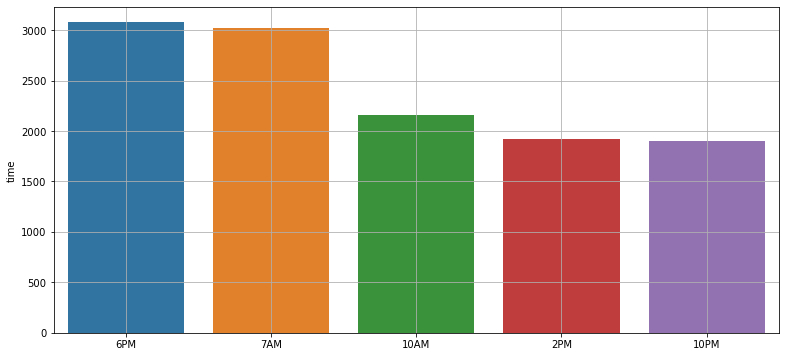

In [35]:
plt.figure(figsize=[13, 6])
sns.barplot(data=data, x=data.time.value_counts().index, y=data.time.value_counts())
plt.grid()

From the bar plot above, I can see that most drivers were sampled at around the 7AM and 6PM time frames. Although not necessarily relevant for my investigation, this plot is moreso to understand the distribution of times for when people were more likely to be sampled.

Let's start with the 6PM time frame to see what the most accepted type of coupons were.

In [36]:
sixPM_df = data[data['time'] == '6PM']
sixPM_df

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
31,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
36,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
37,Home,Alone,Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12672,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,1,0,0
12673,Home,Alone,Sunny,30,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,0
12676,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12677,Home,Partner,Sunny,30,6PM,Restaurant(<20),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,1


In [37]:
total_coupon = data.groupby(['time', 'coupon'])[['Y']].count().unstack()
total_coupon

Y                                                       \
coupon  Bar Carry out & Take away Coffee House Restaurant(20-50)   
time                                                               
10AM    417                   490          857               107   
10PM    382                   439          282               357   
2PM     113                   209          759               175   
6PM     539                   413         1043               368   
7AM     462                   729          875               410   

                        
coupon Restaurant(<20)  
time                    
10AM               287  
10PM               443  
2PM                660  
6PM                715  
7AM                548

In [38]:
accepted_coupon = data.groupby(['time', 'coupon'])[['Y']].sum().unstack()
accepted_coupon

Y                                                       \
coupon  Bar Carry out & Take away Coffee House Restaurant(20-50)   
time                                                               
10AM    154                   343          544                65   
10PM    177                   337          121               121   
2PM      38                   181          414                96   
6PM     249                   339          430               185   
7AM     170                   482          385               165   

                        
coupon Restaurant(<20)  
time                    
10AM               206  
10PM               225  
2PM                537  
6PM                591  
7AM                322

In [39]:
ratio = accepted_coupon / total_coupon
ratio

Y                                                       \
coupon       Bar Carry out & Take away Coffee House Restaurant(20-50)   
time                                                                    
10AM    0.369305              0.700000     0.634772          0.607477   
10PM    0.463351              0.767654     0.429078          0.338936   
2PM     0.336283              0.866029     0.545455          0.548571   
6PM     0.461967              0.820823     0.412272          0.502717   
7AM     0.367965              0.661180     0.440000          0.402439   

                        
coupon Restaurant(<20)  
time                    
10AM          0.717770  
10PM          0.507901  
2PM           0.813636  
6PM           0.826573  
7AM           0.587591

In [40]:
ratio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 10AM to 7AM
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (Y, Bar)                    5 non-null      float64
 1   (Y, Carry out & Take away)  5 non-null      float64
 2   (Y, Coffee House)           5 non-null      float64
 3   (Y, Restaurant(20-50))      5 non-null      float64
 4   (Y, Restaurant(<20))        5 non-null      float64
dtypes: float64(5)
memory usage: 240.0+ bytes


<AxesSubplot:xlabel='None-coupon', ylabel='time'>

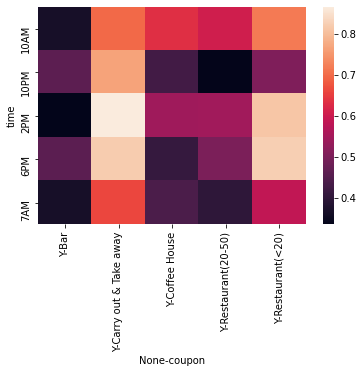

In [41]:
sns.heatmap(ratio)

### Findings:

Based on the heatmap generated above, we can see that time seems to play less of a factor on coupon acceptance than I originally hypothesized. We can see that there is more similarly colored regions vertically along coupon types rather than horizontally across the same times. For example, all of the bar coupon column has more dark colored and lower acceptance rates compared to any other coupon type. This transcends the time element of when people were asked about bar coupons as all times show similarly low bar coupon acceptance rates. This is also seen in the carry-out and take away column with very high coupon acceptance rates at all times of day. While there are some minor conclusions we can draw from the heatmap about hot times for certain types of coupons, it would be an exaggeration to say that time has a significant impact on what types of coupons are accepted. This proves my original hypothesis wrong and rather corroborates the implication that the type of coupon presented to drivers shows more of a correlation to coupon acceptance rates.